In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
symptoms={'symptoms':['Fever','Tiredness','Dry-cough','Shortness of breath','aches and pains','Sore throat','Diarrhoea','Nausea','vomiting','abdominal pain'],'percentage':[98.6,69.9,82,16.6,14.8,13.9,10.1,10.1,3.6,2.2]
    
}
symptoms=pd.DataFrame(data=symptoms,index=range(10))
symptoms

,symptoms,percentage
0,Fever,98.6
1,Tiredness,69.9
2,Dry-cough,82.0
3,Shortness of breath,16.6
4,aches and pains,14.8
5,Sore throat,13.9
6,Diarrhoea,10.1
7,Nausea,10.1
8,vomiting,3.6
9,abdominal pain,2.2


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


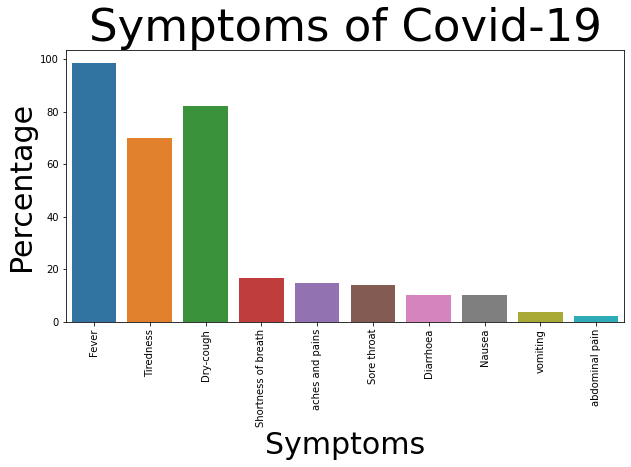

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(symptoms["symptoms"],symptoms["percentage"])
plt.xticks(rotation=90)
plt.xlabel("Symptoms", size=30)
plt.ylabel("Percentage", size=30)
plt.title("Symptoms of Covid-19", size=45)

plt.show()

In [ ]:
x	array-like. The wedge sizes.autopct string, used to label the wedges with their numeric value. The label will be placed inside the wedge. The format string will be fmt%pct.

A legend is an area describing the elements of the graph. In the matplotlib library, there’s a function called legend() which is used to Place a legend on the axes.

The attribute Loc in legend() is used to specify the location of the legend.Default value of loc is loc=”best” (upper left). The strings ‘upper left’, ‘upper right’, ‘lower left’, ‘lower right’ place the legend at the corresponding corner of the axes/figure.

The attribute bbox_to_anchor=(x, y) of legend() function is used to specify the coordinates of the legend, and the attribute ncol represents the number of columns that the legend has.It’s default value is 1.

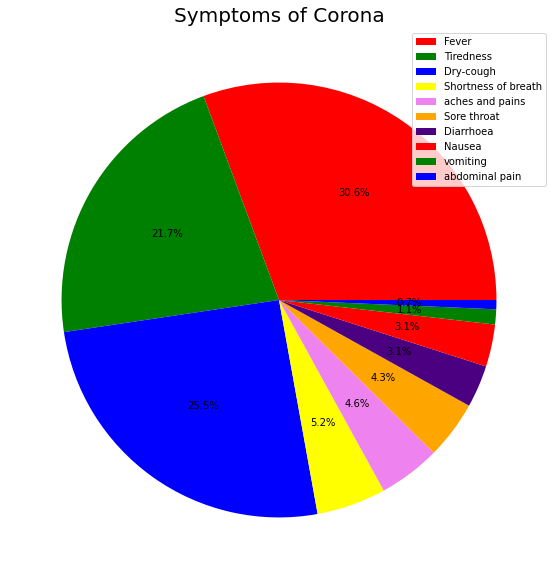

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Symptoms of Corona",fontsize=20)
plt.pie(symptoms["percentage"],colors = ['red','green','blue','yellow','violet','orange','indigo'],autopct="%1.1f%%")
plt.legend(symptoms['symptoms'],loc='best')
plt.show() 

In [4]:
district_data = pd.read_csv("/content/district_level_latest.csv")
state_data = pd.read_csv("/content/state_level_latest.csv")
country_data = pd.read_csv("/content/nation_level_daily.csv")
patient_data = pd.read_csv("/content/patients_data.csv")
tests_state_data = pd.read_csv("/content/tests_state_wise.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,12,13,14,15,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
district_data = district_data.drop(['District_Notes','Last_Updated'],axis=1)
district_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SlNo             800 non-null    int64 
 1   State_Code       800 non-null    object
 2   State            800 non-null    object
 3   District_Key     800 non-null    object
 4   District         800 non-null    object
 5   Confirmed        800 non-null    int64 
 6   Active           800 non-null    int64 
 7   Recovered        800 non-null    int64 
 8   Deceased         800 non-null    int64 
 9   Migrated_Other   800 non-null    int64 
 10  Delta_Confirmed  800 non-null    int64 
 11  Delta_Active     800 non-null    int64 
 12  Delta_Recovered  800 non-null    int64 
 13  Delta_Deceased   800 non-null    int64 
dtypes: int64(10), object(4)
memory usage: 87.6+ KB


In [ ]:
state_data.columns

Index(['State', 'Confirmed', 'Recovered', 'Deaths', 'Active',
       'Last_Updated_Time', 'Migrated_Other', 'State_code', 'Delta_Confirmed',
       'Delta_Recovered', 'Delta_Deaths', 'State_Notes'],
      dtype='object')

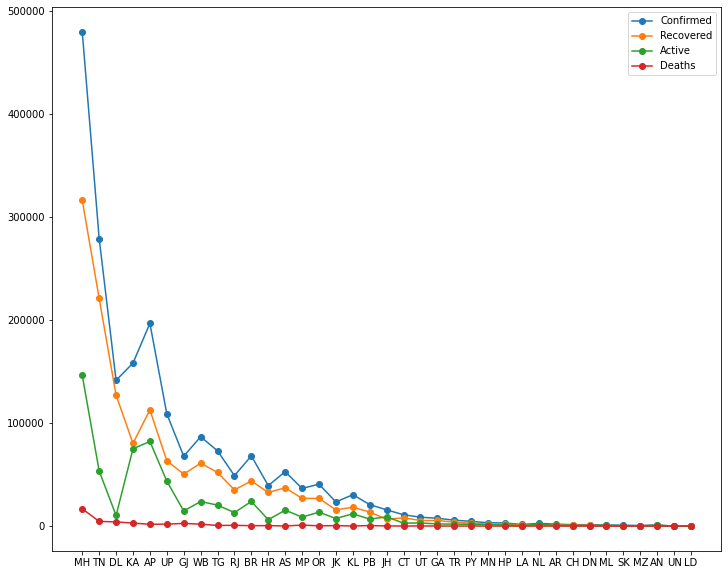

In [ ]:
# Drop the column of Totals
state_data = state_data.drop(0)

# Plot the Confirmed, Recovered, Active and Deaths on the same plot using matplotlib
plt.figure(figsize=(12,10))
x = state_data['State_code']
y = state_data['Confirmed']
plt.plot(x,y,marker='o',label="Confirmed")
y = state_data['Recovered']
plt.plot(x,y,marker='o',label="Recovered")
y = state_data['Active']
plt.plot(x,y,marker='o',label="Active")
y = state_data['Deaths']
plt.plot(x,y,marker='o',label="Deaths")
plt.legend();

Selecting The Data For Top 20 States wrt 'Confirmed' Cases

In [7]:
state_top20 = state_data.nlargest(20,'Confirmed')
state_top20

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Total,2025409,1377384,41638,605933,06/08/2020 23:46:37,454,TT,0,0,0,NaN
1,Maharashtra,479779,316375,16792,146305,06/08/2020 20:42:51,307,MH,0,0,0,307 cases are marked as non-covid deaths in MH...
2,Tamil Nadu,279144,221087,4571,53486,06/08/2020 19:44:47,0,TN,0,0,0,[July 22]: 444 backdated deceased entries adde...
5,Andhra Pradesh,196789,112870,1753,82166,06/08/2020 19:45:03,0,AP,0,0,0,Total includes patients from other states and ...
4,Karnataka,158254,80281,2897,75067,06/08/2020 21:19:51,9,KA,0,0,0,NaN
3,Delhi,141531,127124,4059,10348,06/08/2020 18:39:45,0,DL,0,0,0,[July 14]: Value for the total tests conducted...
6,Uttar Pradesh,108974,63402,1918,43654,06/08/2020 17:53:49,0,UP,0,0,0,NaN
8,West Bengal,86754,61023,1902,23829,06/08/2020 21:28:42,0,WB,0,0,0,NaN
9,Telangana,73050,52103,589,20358,06/08/2020 11:26:06,0,TG,0,0,0,[July 27]\nTelangana bulletin for the previous...
11,Bihar,68148,43820,388,23939,06/08/2020 17:29:43,1,BR,0,0,0,NaN


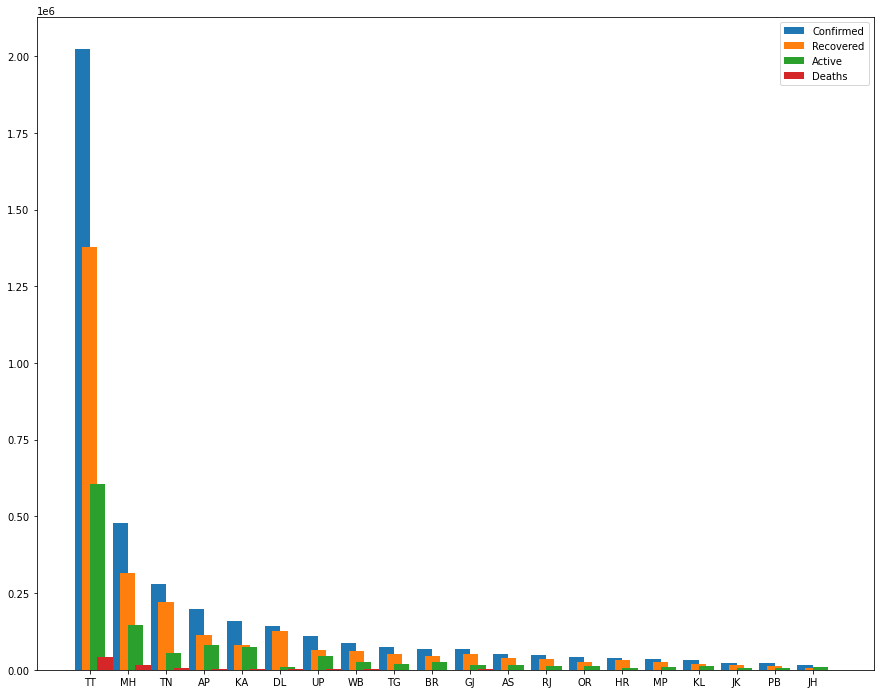

In [10]:
ind = np.arange(20)

# Width of a bar 
width = 0.4
plt.figure(figsize=(15,12))
x = state_top20['State_code']
y = state_top20['Confirmed']
plt.bar(ind+width/2,y,align='edge',width=width,label="Confirmed")
y = state_top20['Recovered']
plt.bar(ind+width,y,align='edge',width=width,label="Recovered")
y = state_top20['Active']
plt.bar(ind+3*width/2,y,align='edge',width=width,label="Active")
y = state_top20['Deaths']
plt.bar(ind+2*width,y,align='edge',width=width,label="Deaths")

plt.xticks(ind + 3*width/2, x)
plt.legend();

In [ ]:
district_top10 = district_data.nlargest(10,'Confirmed')
district_top10

,SlNo,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased
772,737,DL,Delhi,DL_Unknown,Unknown,140743,9561,127124,4058,0,0,0,0,0
346,385,MH,Maharashtra,MH_Mumbai,Mumbai,120150,20546,92659,6648,297,910,-133,986,57
609,545,TN,Tamil Nadu,TN_Chennai,Chennai,106096,11723,92128,2245,0,1092,-91,1162,21
356,394,MH,Maharashtra,MH_Pune,Pune,104353,41000,60857,2496,0,3091,1615,1414,62
363,401,MH,Maharashtra,MH_Thane,Thane,100875,27012,70983,2879,1,1312,-3394,4650,56
285,273,KA,Karnataka,KA_Bengaluru Urban,Bengaluru Urban,67425,32314,33932,1178,1,2544,-443,2972,15
573,578,TG,Telangana,TG_Hyderabad,Hyderabad,41449,41121,305,23,0,535,535,0,0
7,6,AP,Andhra Pradesh,AP_East Godavari,East Godavari,27580,12583,14792,205,0,1351,973,368,10
166,157,GJ,Gujarat,GJ_Ahmedabad,Ahmedabad,27434,3660,22152,1622,0,151,29,117,5
751,716,WB,West Bengal,WB_Kolkata,Kolkata,25882,6886,18109,887,0,680,105,548,27


([<matplotlib.axis.XTick at 0x7f63063d09e8>,
 <a list of 10 Text major ticklabel objects>)

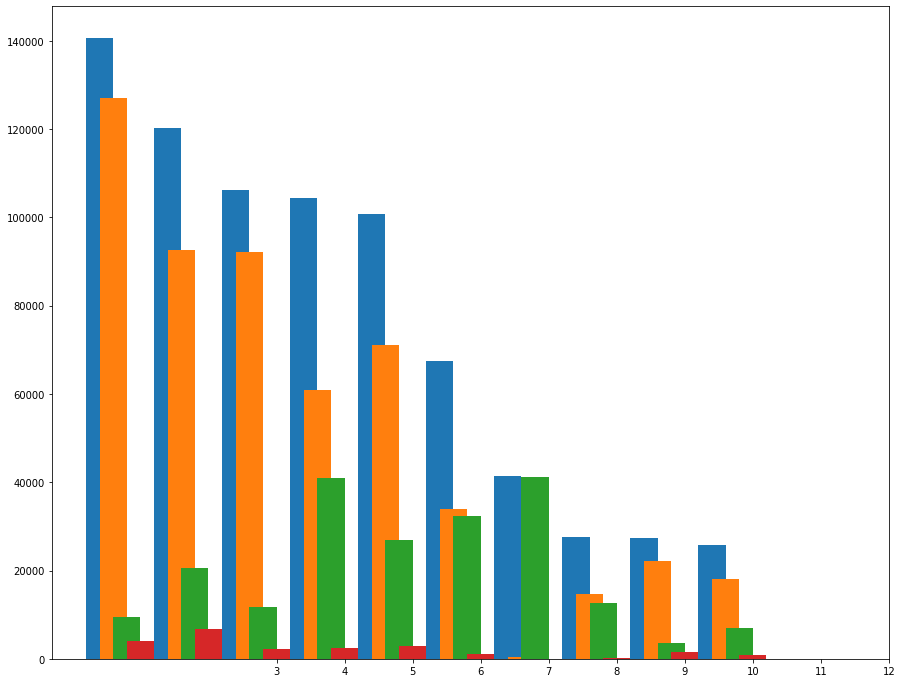

In [ ]:
ind = np.arange(10)

# Width of a bar 
width = 0.4

plt.figure(figsize=(15,12))
x = district_top10['District']
y = district_top10['Confirmed']
plt.bar(ind+width/2,y,align='edge',width=width,label="Confirmed")
y = district_top10['Recovered']
plt.bar(ind+width,y,align='edge',width=width,label="Recovered")
y = district_top10['Active']
plt.bar(ind+3*width/2,y,align='edge',width=width,label="Active")
y = district_top10['Deceased']
plt.bar(ind+2*width,y,align='edge',width=width,label="Deseased")

plt.xticks(ind + 3)

In [ ]:
!pip install geopandas

     |████████████████████████████████| 972kB 3.4MB/s 
     |████████████████████████████████| 14.8MB 275kB/s 
     |████████████████████████████████| 10.9MB 38.5MB/s 


In [ ]:
!pip install pyshp

     |████████████████████████████████| 225kB 3.4MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.2-cp36-none-any.whl size=36216 sha256=279789f30e78f520d1edca2caa5b71ff3794930fb14d96d3b01a1f0110ebd734
  Stored in directory: /root/.cache/pip/wheels/96/6c/53/4112475adf3b831da97f083163d0f38ee6daac9c1b13f7afea
Successfully built pyshp


In [ ]:
import geopandas as gpd

map_df = gpd.read_file("/content/Indiageofiles/india-polygon.shp" )
map_df.rename(columns={'st_nm': 'State'},inplace=True)
map_df.head() #check the head of the file

,id,State,geometry
0,None,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,None,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,None,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,None,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,None,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


In [ ]:
data_merge = map_df.merge(state_data, on = 'State', how = 'left')
data_merge.head()

,id,State,geometry,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,None,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",1123.0,355.0,16.0,752.0,06/08/2020 20:45:08,0.0,AN,0.0,0.0,0.0,NaN
1,None,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",1948.0,1245.0,3.0,700.0,06/08/2020 23:17:40,0.0,AR,0.0,0.0,0.0,[July 25]: All numbers corresponding to Papum ...
2,None,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",52818.0,37225.0,126.0,15464.0,06/08/2020 23:00:49,3.0,AS,0.0,0.0,0.0,Includes 1 case from Nagaland
3,None,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640...",68148.0,43820.0,388.0,23939.0,06/08/2020 17:29:43,1.0,BR,0.0,0.0,0.0,NaN
4,None,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552...",1327.0,777.0,20.0,529.0,06/08/2020 18:11:05,1.0,CH,0.0,0.0,0.0,NaN


Plotting 'Confirmed' Cases On Map of India : Heatmap


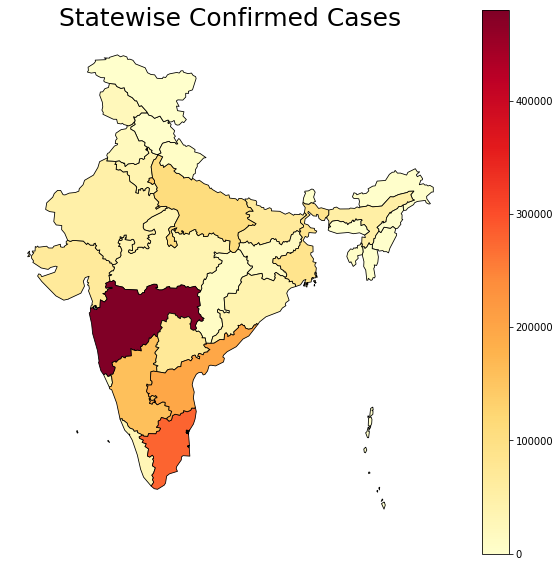

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Statewise Confirmed Cases', fontdict={'fontsize': '25', 'fontweight' : '10'})

# plot the figure
data_merge.plot(column='Confirmed',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337]);

Plotting 'Recovered' Cases On Map of India : Heatmap

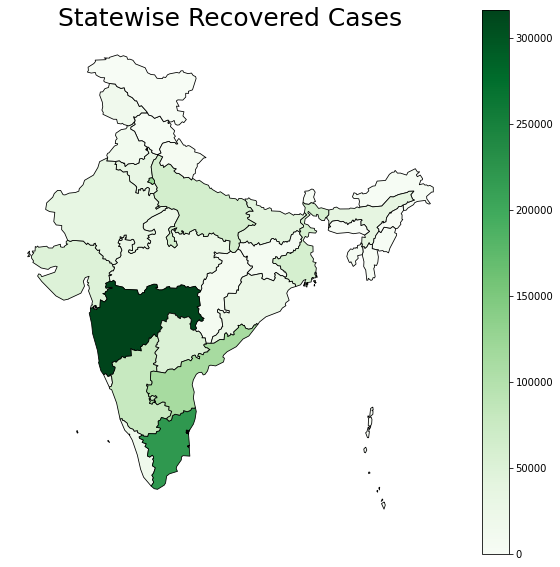

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Statewise Recovered Cases', fontdict={'fontsize': '25', 'fontweight' : '10'})
data_merge.plot(column='Recovered',cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337]);

Plotting 'Deaths' Cases On Map Of India : Heatmap


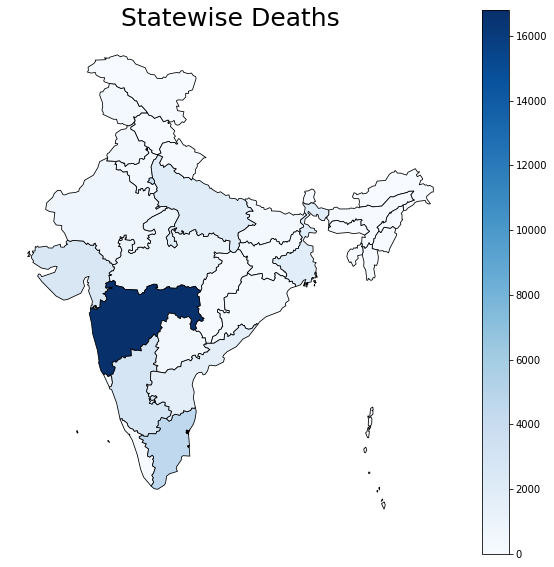

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Statewise Deaths', fontdict={'fontsize': '25', 'fontweight' : '10'})
data_merge.plot(column='Deaths',cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337]);

In [20]:
india_covid_19 = pd.read_csv('/content/covid_19_india.csv')

In [21]:
state_cases = india_covid_19.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()

#state_cases = state_cases.astype({'Deaths': 'int'})
state_cases['Active'] = state_cases['Confirmed'] - (state_cases['Deaths']+state_cases['Cured'])
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured"]/state_cases["Confirmed"],2)
state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Blues',subset=["Deaths"])\
                        .background_gradient(cmap='Blues',subset=["Cured"])\
                        .background_gradient(cmap='Blues',subset=["Active"])\
                        .background_gradient(cmap='Blues',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Blues',subset=["Cure Rate (per 100)"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
22,Maharashtra,1465911,38717,1179726,247468,2.640000,80.480000
1,Andhra Pradesh,729307,6052,672479,50776,0.830000,92.210000
18,Karnataka,657705,9461,533074,115170,1.440000,81.050000
32,Tamil Nadu,630408,9917,575212,45279,1.570000,91.240000
39,Uttar Pradesh,420937,6153,370753,44031,1.460000,88.080000
11,Delhi,295236,5581,266935,22720,1.890000,90.410000
41,West Bengal,277049,5318,243743,27988,1.920000,87.980000
19,Kerala,242799,884,154092,87823,0.360000,63.460000
27,Odisha,238003,940,210217,26846,0.390000,88.330000
35,Telengana,204748,1189,177008,26551,0.580000,86.450000


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [24]:
train_df=pd.read_csv("/content/train (1).csv")

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23562 entries, 0 to 23561
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              23562 non-null  int64  
 1   Province_State  10010 non-null  object 
 2   Country_Region  23562 non-null  object 
 3   Date            23562 non-null  object 
 4   ConfirmedCases  23562 non-null  float64
 5   Fatalities      23562 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.1+ MB


In [33]:
train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df['day'] = train_df['Date'].dt.day
train_df['month'] = train_df['Date'].dt.month
train_df['dayofweek'] = train_df['Date'].dt.dayofweek
train_df['dayofyear'] = train_df['Date'].dt.dayofyear
train_df['quarter'] = train_df['Date'].dt.quarter
train_df['weekofyear'] = train_df['Date'].dt.weekofyear

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


In [36]:
countries = list(train_df['Country_Region'].unique())
india_code = countries.index('India')
train_df = train_df.drop(['Date','Id'],1)

In [39]:
from sklearn.preprocessing import OrdinalEncoder
train_df.Province_State.fillna('NaN', inplace=True)
oe = OrdinalEncoder()
train_df[['Province_State','Country_Region']] = oe.fit_transform(train_df.loc[:,['Province_State','Country_Region']])

In [48]:
columns = ['day','month','dayofweek','dayofyear','quarter','weekofyear','Province_State', 'Country_Region','ConfirmedCases','Fatalities']
train_df = train_df[columns]
x = train_df.drop(['Fatalities','ConfirmedCases'],axis= 1)
y = train_df['ConfirmedCases']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [52]:
rf = RandomForestRegressor(random_state=0,n_estimators=100)
rf.fit(x_train,y_train)
print('training accuracy:',rf.score(x_train,y_train))
print('testing accuracy:',rf.score(x_test,y_test))

training accuracy: 0.9947915466084007
testing accuracy: 0.9403889315983659
